# Mount dataset resources

In [1]:
import re
import pandas as pd
import numpy as np
import warnings

import datetime
from datetime import datetime, date
import time

# Visualisation
from matplotlib import pyplot as plt

# Suppress warnings
warnings.filterwarnings("ignore")

# чтениие/запись файлов в feather-формате
import feather

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd '/content/drive/MyDrive/github/eda_examples/Kaggle_Flight_Data_Analysis/'
%pwd

/content/drive/MyDrive/github/eda_examples/Kaggle_Flight_Data_Analysis


'/content/drive/MyDrive/github/eda_examples/Kaggle_Flight_Data_Analysis'

# Kaggle 2015 Flight Delay Data Analysis


In [4]:
# Importing the packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
# Display settings
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [5]:
# Loading the file
flights = pd.read_csv('./flights.csv')
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,531.0,-9.0,9.0,540.0,137,132.0,109.0,820,729.0,14.0,757,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,1635,N025AA,ATL,DFW,625,NaN,NaN,NaN,NaN,150,NaN,NaN,731,NaN,NaN,755,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,754.0,-6.0,11.0,805.0,105,100.0,84.0,515,929.0,5.0,945,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,901.0,1.0,56.0,957.0,148,159.0,100.0,908,1237.0,3.0,1228,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,1010.0,0.0,22.0,1032.0,200,195.0,171.0,1020,1223.0,2.0,1230,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


### Part 1: Exploratory Analysis
#### 1. How many observations are there? How many features are there?

In [6]:
# .shape attribute gives us the count of observations.
print(f'{flights.shape[0]:5} - Total number of observations')
# Similarly we can get the count of features
print(f'{flights.shape[1]:5} - Total number of features')
# list of columns name
print(f"\nThe column names in the flights dataset are:\n {flights.columns.values}")

 5821 - Total number of observations
   31 - Total number of features

The column names in the flights dataset are:
 ['YEAR' 'MONTH' 'DAY' 'DAY_OF_WEEK' 'AIRLINE' 'FLIGHT_NUMBER'
 'TAIL_NUMBER' 'ORIGIN_AIRPORT' 'DESTINATION_AIRPORT'
 'SCHEDULED_DEPARTURE' 'DEPARTURE_TIME' 'DEPARTURE_DELAY' 'TAXI_OUT'
 'WHEELS_OFF' 'SCHEDULED_TIME' 'ELAPSED_TIME' 'AIR_TIME' 'DISTANCE'
 'WHEELS_ON' 'TAXI_IN' 'SCHEDULED_ARRIVAL' 'ARRIVAL_TIME' 'ARRIVAL_DELAY'
 'DIVERTED' 'CANCELLED' 'CANCELLATION_REASON' 'AIR_SYSTEM_DELAY'
 'SECURITY_DELAY' 'AIRLINE_DELAY' 'LATE_AIRCRAFT_DELAY' 'WEATHER_DELAY']


#### 2. How many different airlines are there? What are their counts?

In [7]:
# Here we are trying to get the distinct/unique values in the airline column.
print(f'{flights.AIRLINE.nunique():5} - total num of different airlines in the dataset')

# Here we are trying to get their counts, we will use group by
airline_counts = flights.groupby('AIRLINE')['AIRLINE'].count().sort_values(ascending = False)
print("\nThe count for the airlines in the dataset in the descending order are:")
airline_counts

   14 - total num of different airlines in the dataset

The count for the airlines in the dataset in the descending order are:


AIRLINE
WN    1285
DL     922
AA     722
OO     593
EV     563
UA     512
MQ     288
B6     263
US     212
AS     145
NK     119
F9      74
VX      66
HA      57
Name: AIRLINE, dtype: int64

#### 3. How many missing values are there in the departure delays? How about arrival delays? Do they match? Why or why not? Remove these observations afterwards.

In [8]:
# Calculating the missing values in departure delays
print(f"{flights['DEPARTURE_DELAY'].isnull().sum():5} - total number of missing values in departure delays")

# Calculating the missing values in the arrival delays
print(f"{flights['ARRIVAL_DELAY'].isnull().sum():5} - total number of missing values in arrival delays")

   91 - total number of missing values in departure delays
  108 - total number of missing values in arrival delays


**The number of missing values for departure delays and arrival delays DO NOT match. We have more missing values for arrival delays.**

In [9]:
# Analysis: Checking if there are flights which are missing ARRIVAL_DELAY values actually departed.
flights[flights['ARRIVAL_DELAY'].isnull()][['DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_TIME','ARRIVAL_DELAY']]

,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY
1,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,NaN
47,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN
172,NaN,NaN,NaN,NaN
174,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN
350,1221.0,31.0,NaN,NaN
359,NaN,NaN,NaN,NaN


**From the above subset of data we can see that there are flights with departure time but are missing arrival delay values.**

In [10]:
# Checking the status of such flights. It can be due to flight returning to base after take off or there can be a diversion.
flights[flights['ARRIVAL_DELAY'].isnull()][['DEPARTURE_TIME','DEPARTURE_DELAY','ARRIVAL_TIME','ARRIVAL_DELAY','DIVERTED','CANCELLED']]

,DEPARTURE_TIME,DEPARTURE_DELAY,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
1,NaN,NaN,NaN,NaN,0,1
10,NaN,NaN,NaN,NaN,0,1
47,NaN,NaN,NaN,NaN,0,1
115,NaN,NaN,NaN,NaN,0,1
116,NaN,NaN,NaN,NaN,0,1
172,NaN,NaN,NaN,NaN,0,1
174,NaN,NaN,NaN,NaN,0,1
190,NaN,NaN,NaN,NaN,0,1
350,1221.0,31.0,NaN,NaN,1,0
359,NaN,NaN,NaN,NaN,0,1


**From the above subset of data we can conclude that this mismatch in the missing values is due to the flight diversion.**

In [11]:
# Dropping the missing values for DEPARTURE_DELAY AND ARRIVAL_DELAY columns
flights.dropna(subset=['DEPARTURE_DELAY','ARRIVAL_DELAY'], axis=0, inplace= True)

In [12]:
# Checking if the missing values for DEPARTURE_DELAY have been dropped from the dataset.
print(f"{flights['DEPARTURE_DELAY'].isnull().sum():5} - total number of missing values in departure delays")

# Checking if the missing values for ARRIVAL_DELAY have been dropped from the dataset.
print(f"{flights['ARRIVAL_DELAY'].isnull().sum():5} - total number of missing values in arrival delays")

    0 - total number of missing values in departure delays
    0 - total number of missing values in arrival delays


#### 4. What is the average and median departure and arrival delay? What do you observe?

In [13]:
# Calculating the average departure delay
print(f"{flights.DEPARTURE_DELAY.mean():5.3f} - Average departure delay")

# Calculating the average arrival delay
print(f"{flights.ARRIVAL_DELAY.mean():5.3f} - Average arrival delay")

# Calculating the median for departure delay.
print(f"{flights.DEPARTURE_DELAY.median():5.3f} - Median departure delay")

# Calculating the median for arrival delay.
print(f"{flights.ARRIVAL_DELAY.median():5.3f} - Median arrival delay")

8.887 - Average departure delay
3.988 - Average arrival delay
-2.000 - Median departure delay
-5.000 - Median arrival delay


**Based on the values above we find that the mean is greater than median for both departure and arrival delay**

In [14]:
# Analysis
# Checking skewness to determine the distribution
print(f'Skew DEPARTURE_DELAY: {flights.DEPARTURE_DELAY.skew():.3f}')
print(f'Skew ARRIVAL_DELAY:   {flights.ARRIVAL_DELAY.skew():.3f}')

Skew DEPARTURE_DELAY: 5.667
Skew ARRIVAL_DELAY:   4.798


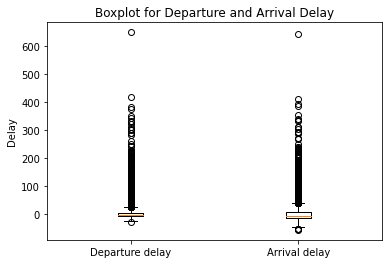

In [15]:
# Creating the boxplot.
plt.boxplot([flights['DEPARTURE_DELAY'], flights['ARRIVAL_DELAY']])
plt.ylabel('Delay')
plt.xticks([1, 2],['Departure delay', 'Arrival delay'])
plt.title('Boxplot for Departure and Arrival Delay')
plt.show()

**Observations:**  
* From the above box plot we can see that there are a lot of outliers and extreme values in the dataset.  
* The coefficient of skewness is also significantly higher than zero.  
* The distribution is skewed to the right and extremely high values have a significant impact on the mean.

#### 5. Display graphically the departure delays and arrival delays for each airline. What do you notice? Explain

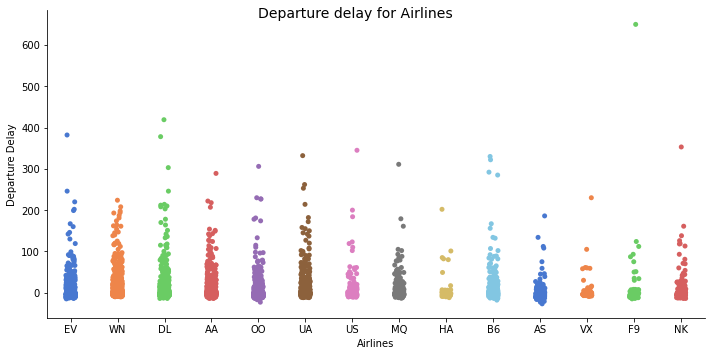

In [16]:
# Creating a category plot for departure delays using seaborn library.
ax = sns.catplot(x = 'AIRLINE', y = 'DEPARTURE_DELAY', data = flights, palette = "muted", aspect=2)
ax.set_xlabels('Airlines')
ax.set_ylabels('Departure Delay')
ax.fig.suptitle('Departure delay for Airlines', fontsize=14)
plt.show()

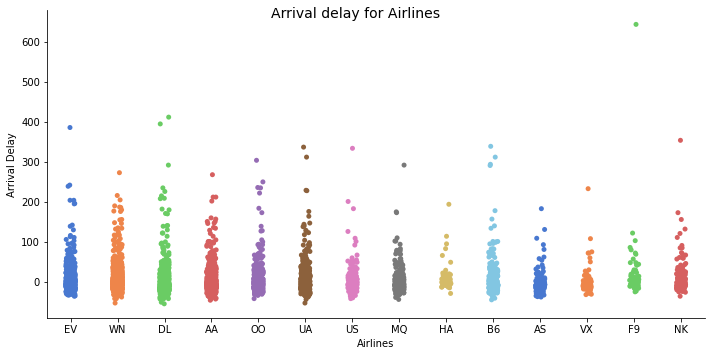

In [17]:
# Creating a category plot for arrival delays using seaborn library.
ax2 = sns.catplot(x = 'AIRLINE', y = 'ARRIVAL_DELAY', data = flights, palette = "muted", aspect=2)
ax2.set_xlabels('Airlines')
ax2.set_ylabels('Arrival Delay')
ax2.fig.suptitle('Arrival delay for Airlines', fontsize=14)
plt.show()

In [18]:
# Checking correlation
print("Correlation Matrix")
flights[['DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']].corr()

Correlation Matrix


,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.023095,-0.027935
DEPARTURE_DELAY,0.023095,1.000000,0.936069
ARRIVAL_DELAY,-0.027935,0.936069,1.000000


In [20]:
df = flights[['DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']].corr()
df.style.background_gradient(cmap='Blues')

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.023095,-0.027935
DEPARTURE_DELAY,0.023095,1.000000,0.936069
ARRIVAL_DELAY,-0.027935,0.936069,1.000000


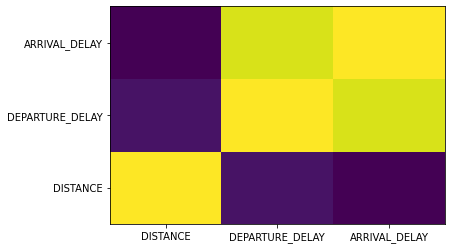

In [21]:
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

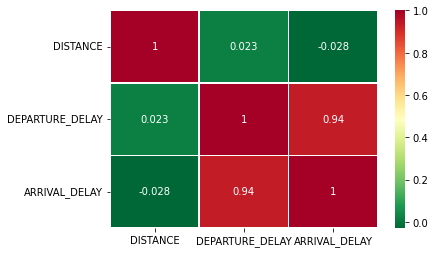

In [22]:
import seaborn as sns
%matplotlib inline

# _r reverses the normal order of the color map 'RdYlGn'
sns.heatmap(df, cmap='RdYlGn_r', linewidths=0.5, annot=True)

In [23]:
import plotly.express as px
fig = px.imshow(df)  #df.corr()
fig.show()

#### Observations:
* We can see that the arrival and departure delay follow the same trend.
* This trend indicate that there might be a strong correlation between the arrival and departure delay.
* From the above correlation matrix we can see that there is no correlation between the distance and delays (0.02 & -0.02).
* However there is a strong positive correlation between the departure and arrival delays (0.93). Hence, delayed flights arrive late.


#### 6. Now calculate the 5 number summary (min, Q1, median, Q3, max) of departure delay for each airline. Arrange it by median delay (descending order). Do the same for arrival delay.
**Departure delay 5 number summary**

In [ ]:
# Calculating departure delay summary, concatenating median to the summary.
departure_delay_data = pd.concat([flights.groupby('AIRLINE')['DEPARTURE_DELAY'].describe(),flights.groupby('AIRLINE')['DEPARTURE_DELAY'].aggregate([np.median])],axis =1)
# Dropping the columns which are not needed.
departure_delay_summary = departure_delay_data.drop(['count','std','mean','50%'], axis=1)
# Sorting by median delay in descending order.
departure_delay_summary.sort_values(by= 'median', axis=0, ascending = False, inplace=True)
# Displaying the results
departure_delay_summary.rename(columns={'min': 'Min', '25%': 'Q1', '75%': 'Q3', 'max':'Max','median': 'Median'})

,Min,Q1,Q3,Max,Median
AIRLINE,,,,,
UA,-12.0,-3.0,14.00,332.0,1.5
WN,-10.0,-3.0,10.00,224.0,0.0
B6,-18.0,-5.0,11.00,330.0,-1.0
VX,-9.0,-4.0,3.25,230.0,-1.5
AA,-14.0,-5.0,7.00,289.0,-2.0
DL,-14.0,-4.0,3.00,419.0,-2.0
NK,-14.0,-6.0,20.00,353.0,-2.0
EV,-15.0,-6.0,4.00,382.0,-3.0
HA,-12.0,-6.0,1.00,202.0,-3.0


**Arrival delay 5 number summary**

In [ ]:
# Calculating arrival delay summary, concatenating median to the summary.
arrival_delay_data = pd.concat([flights.groupby('AIRLINE')['ARRIVAL_DELAY'].describe(),flights.groupby('AIRLINE')['ARRIVAL_DELAY'].aggregate([np.median])],axis =1)
# Dropping the columns which are not needed.
arrival_delay_summary = arrival_delay_data.drop(['count','std','mean','50%'], axis=1)
# Sorting by median delay in descending order.
arrival_delay_summary.sort_values(by= 'median', axis=0, ascending = False, inplace=True)
# Displaying the results
arrival_delay_summary.rename(columns={'min': 'Min', '25%': 'Q1', '75%': 'Q3', 'max':'Max','median': 'Median'})

,Min,Q1,Q3,Max,Median
AIRLINE,,,,,
F9,-25.0,-9.00,15.00,644.0,1.0
HA,-29.0,-5.00,10.00,194.0,-1.0
NK,-36.0,-10.75,23.00,354.0,-2.0
OO,-42.0,-12.00,8.00,304.0,-3.0
EV,-36.0,-12.00,8.00,386.0,-4.0
US,-42.0,-13.00,11.00,334.0,-4.0
WN,-53.0,-12.00,8.00,273.0,-4.0
B6,-45.0,-15.00,14.00,339.0,-5.0
UA,-53.0,-15.00,10.00,337.0,-5.5


#### 7. Which airport has the most averaged departure delay? Give me the top 10 airports. Why do you think the number 1 airport has that much delay?

In [ ]:
# To calculate the average departure delay we need to group by on origin airport.
# Creating a subset of data.
mean_departure_delay = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].aggregate([np.mean])
print("The airport with the most averaged departure delay is")
mean_departure_delay[mean_departure_delay['mean'] == mean_departure_delay['mean'].max()]

The airport with the most averaged departure delay is


,mean
ORIGIN_AIRPORT,
FAR,161.0


In [ ]:
# Displaying top 10 airports
mean_departure_delay.sort_values(by= 'mean', axis=0, ascending = False).head(10)

,mean
ORIGIN_AIRPORT,
FAR,161.000000
12898,119.000000
BMI,101.333333
ERI,92.000000
MYR,88.000000
14576,88.000000
14696,88.000000
10157,87.500000
12992,80.000000


In [ ]:
# Checking the number of observations of airport == FAR in the dataset.
flights[flights['ORIGIN_AIRPORT'] == 'FAR']

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
2991,2015,7,6,1,MQ,3195,N658MQ,FAR,ORD,1214,1455.0,161.0,21.0,1516.0,116,130.0,88.0,557,1644.0,21.0,1410,1705.0,175.0,0,0,NaN,100.0,0.0,0.0,75.0,0.0


#### Observation:
* Here, we can see that the airport FAR has only one observation in the dataset. Hence, the reason for it being the airport with the maximum average delay.

#### 8. Do you expect the departure delay has anything to do with distance of trip? What about arrival delay and distance? Prove your claims.

In [ ]:
# Checking if there is a correlation between distance and departure delay as well as between distance and arrival delay.
# Creating the correlation matrix for the above
flights[['DISTANCE','DEPARTURE_DELAY','ARRIVAL_DELAY']].corr()

,DISTANCE,DEPARTURE_DELAY,ARRIVAL_DELAY
DISTANCE,1.000000,0.023095,-0.027935
DEPARTURE_DELAY,0.023095,1.000000,0.936069
ARRIVAL_DELAY,-0.027935,0.936069,1.000000


#### Observations:
* The above correlation matrix proves that the distance has nothing to do with the departure and arrival delays.
* There is no correlation between the distance and the departure and arrival delays.

#### 9. What about day of week vs departure delay?

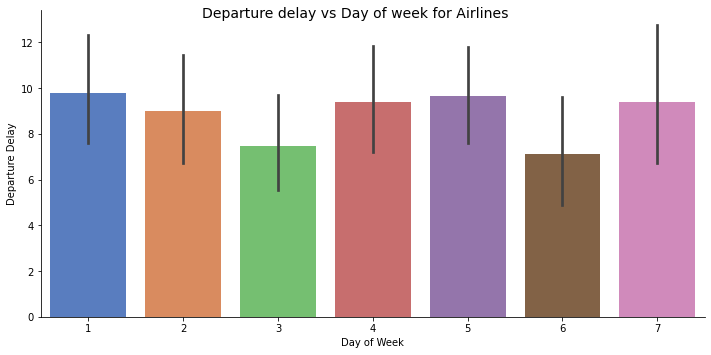

In [ ]:
# Plotting a graph of week vs departure delay
ax3 = sns.catplot(x = 'DAY_OF_WEEK', y = 'DEPARTURE_DELAY', data = flights, kind="bar", palette = "muted", aspect=2)
ax3.set_xlabels('Day of Week')
ax3.set_ylabels('Departure Delay')
ax3.fig.suptitle('Departure delay vs Day of week for Airlines', fontsize=14)
plt.show()

In [ ]:
# Checking correlation
flights[['DAY_OF_WEEK','DEPARTURE_DELAY']].corr()

,DAY_OF_WEEK,DEPARTURE_DELAY
DAY_OF_WEEK,1.000000,-0.004786
DEPARTURE_DELAY,-0.004786,1.000000


#### Observations:
* From the above graph we can see that the average departure delay for each day of the week is nearly same.
* The correlation matrix also proves that there is no correlation between the departure delay and day of the week.

#### 10. If there is a departure delay (i.e. positive values for departure delay), does distance have anything to do with arrival delay? Explain. (My experience has been that longer distance flights can make up more time.)

In [ ]:
# Creating a subset of dataframe comprising of positive departure values
positive_departure_delay_subset = flights[flights['DEPARTURE_DELAY'] > 0]
positive_departure_delay_subset.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,901.0,1.0,56.0,957.0,148,159.0,100.0,908,1237.0,3.0,1228,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,1349.0,32.0,27.0,1416.0,66,70.0,39.0,222,1555.0,4.0,1523,1559.0,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0
12,2015,1,1,4,US,705,N567UW,CLT,LAS,1800,1813.0,13.0,15.0,1828.0,295,289.0,266.0,1916,1954.0,8.0,1955,2002.0,7.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
14,2015,1,1,4,UA,1468,N68807,IAH,SEA,1912,1924.0,12.0,9.0,1933.0,289,259.0,245.0,1874,2138.0,5.0,2201,2143.0,-18.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
15,2015,1,1,4,WN,688,N242WN,MKE,STL,1945,1951.0,6.0,9.0,2000.0,75,69.0,55.0,317,2055.0,5.0,2100,2100.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


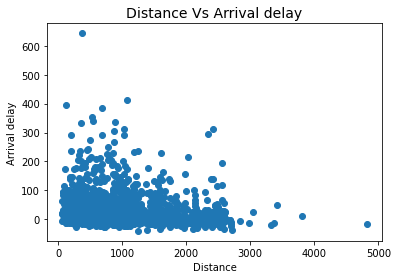

In [ ]:
# Creating a scatter plot to see the relation between distance and arrival delay
plt.scatter(positive_departure_delay_subset['DISTANCE'],positive_departure_delay_subset['ARRIVAL_DELAY'])
plt.ylabel("Arrival delay")
plt.xlabel("Distance")
plt.title('Distance Vs Arrival delay', fontsize=14)
plt.show()

In [ ]:
# Checking correlation
positive_departure_delay_subset[['DISTANCE','ARRIVAL_DELAY']].corr()

,DISTANCE,ARRIVAL_DELAY
DISTANCE,1.000000,-0.094924
ARRIVAL_DELAY,-0.094924,1.000000


#### Observations:
* Distance has nothing to do with arrival delay.
* The scatter plot and the correlation matrix suggests the same. All the long distance flight may or may not be able to makeup the lost time.

#### 11. Come up with two interesting questions that you want to answer, then explore it in using this data set. Use any numerical or graphical methods to support your answers. (preferably both).

**Q1. From which airport does most flights originate?**

In [ ]:
# Creating a subset of values
originating_flights = flights.groupby('ORIGIN_AIRPORT').agg({'AIRLINE': 'count'})
originating_flights = originating_flights.reset_index()
# Picking only top 10 airports.
originating_flights = originating_flights.sort_values(by = 'AIRLINE', ascending = False).head(10)
originating_flights.head()

,ORIGIN_AIRPORT,AIRLINE
127,ATL,326
292,ORD,287
180,DFW,235
249,LAX,205
179,DEN,191


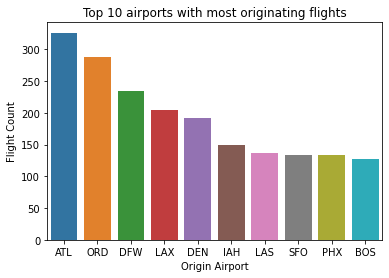

In [ ]:
sns.barplot(x=originating_flights['ORIGIN_AIRPORT'], y=originating_flights['AIRLINE'])
plt.xlabel('Origin Airport')
plt.ylabel('Flight Count')
plt.title('Top 10 airports with most originating flights')
plt.show()

**Answer: From the analysis above, we can see that the most flights originate from ATL airport**

**Q2. Which is the most visited city?**

In [ ]:
# Creating a subset of destination flights
destination_flights = flights.groupby('DESTINATION_AIRPORT').agg({'AIRLINE': 'count'})
destination_flights = destination_flights.reset_index()
# Picking only top 10 airports.
destination_flights = destination_flights.sort_values(by = 'AIRLINE', ascending = False).head(10)
destination_flights.head()

,DESTINATION_AIRPORT,AIRLINE
122,ATL,365
297,ORD,278
177,DFW,221
176,DEN,203
248,LAX,199


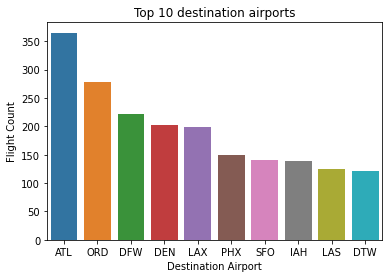

In [ ]:
sns.barplot(x=destination_flights['DESTINATION_AIRPORT'], y=destination_flights['AIRLINE'])
plt.xlabel('Destination Airport')
plt.ylabel('Flight Count')
plt.title('Top 10 destination airports')
plt.show()

**Answer: From the above analysis, we can deduce that ATL is the most visited city. If we combine the results of both Q1 and Q2 we can say ATL is the busiest airport.**

**Q3. Since ATL is the most visited destination. In which part of the year do people visit it most?**

In [ ]:
# Creating a subset of data with ATL as the only destination airport
atl_data = flights[flights['DESTINATION_AIRPORT'] == 'ATL']
atl_monthly_count = atl_data.groupby('MONTH').agg({'AIRLINE':'count'})
atl_monthly_count = atl_monthly_count.reset_index()
atl_monthly_count

,MONTH,AIRLINE
0,1,26
1,2,21
2,3,50
3,4,38
4,5,38
5,6,42
6,7,38
7,8,33
8,9,26
9,11,27


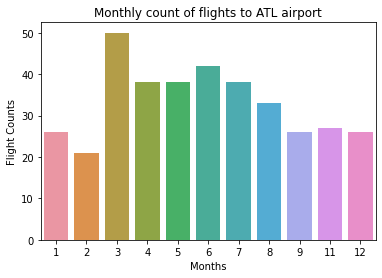

In [ ]:
sns.barplot(x=atl_monthly_count['MONTH'], y=atl_monthly_count['AIRLINE'])
plt.xlabel('Months')
plt.ylabel('Flight Counts')
plt.title('Monthly count of flights to ATL airport')
plt.show()

**Answer: There are maximum flights in the month of March and in the summer months the count of flights is more. Hence people visit ATL mostly during Spring and Summer.**

In [ ]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,EV,4160,N11150,JAX,EWR,540,531.0,-9.0,9.0,540.0,137,132.0,109.0,820,729.0,14.0,757,743.0,-14.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,WN,119,N271LV,RSW,ATL,800,754.0,-6.0,11.0,805.0,105,100.0,84.0,515,929.0,5.0,945,934.0,-11.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,EV,4936,N738EV,MSP,IAD,900,901.0,1.0,56.0,957.0,148,159.0,100.0,908,1237.0,3.0,1228,1240.0,12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,DL,2319,N960DL,LGA,MSP,1010,1010.0,0.0,22.0,1032.0,200,195.0,171.0,1020,1223.0,2.0,1230,1225.0,-5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,DL,1806,N594NW,LAX,DTW,1115,1113.0,-2.0,15.0,1128.0,266,248.0,226.0,1979,1814.0,7.0,1841,1821.0,-20.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Q4. Does all airlines have same taxi in and taxi out times?**

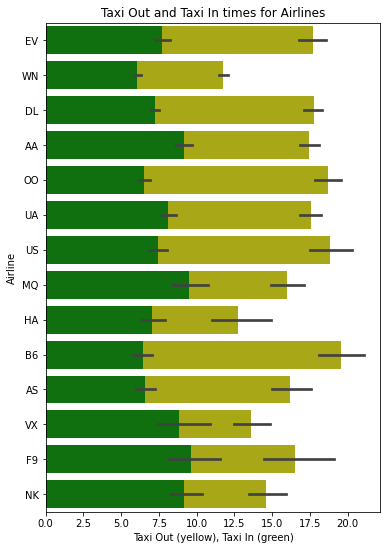

In [ ]:
ax4 = plt.subplots(figsize=(6,9))
ax4 = sns.barplot(x="TAXI_OUT", y="AIRLINE", data=flights, color="y")
ax4 = sns.barplot(x="TAXI_IN", y="AIRLINE", data=flights, color="g")
plt.ylabel('Airline')
plt.xlabel('Taxi Out (yellow), Taxi In (green)')
plt.title('Taxi Out and Taxi In times for Airlines')
plt.show()

**Answer: Taxi out and Taxi in times for all the airlines is different. However, for all the airlines taxi in times is significantly less than taxi out.**

### Part 2: Regression Analysis
#### Subpart 1

#### 1. Your response is ARRIVAL_DELAY. First, remove all the missing data in the WEATHER_DELAY column. Once you do this, there shouldn't be anymore missing values in the data set(except for the cancellation reason feature). Check that.

In [ ]:
# Checking missing values
print(f"{flights['WEATHER_DELAY'].isnull().sum():5} - Total missing values")

 4641 - Total missing values


In [ ]:
# Dropping missing values
flights.dropna(axis=0, subset=['WEATHER_DELAY'], inplace=True)
# Checking the result.
flights.isnull().sum()

YEAR                      0
MONTH                     0
DAY                       0
DAY_OF_WEEK               0
AIRLINE                   0
FLIGHT_NUMBER             0
TAIL_NUMBER               0
ORIGIN_AIRPORT            0
DESTINATION_AIRPORT       0
SCHEDULED_DEPARTURE       0
DEPARTURE_TIME            0
DEPARTURE_DELAY           0
TAXI_OUT                  0
WHEELS_OFF                0
SCHEDULED_TIME            0
ELAPSED_TIME              0
AIR_TIME                  0
DISTANCE                  0
WHEELS_ON                 0
TAXI_IN                   0
SCHEDULED_ARRIVAL         0
ARRIVAL_TIME              0
ARRIVAL_DELAY             0
DIVERTED                  0
CANCELLED                 0
CANCELLATION_REASON    1072
AIR_SYSTEM_DELAY          0
SECURITY_DELAY            0
AIRLINE_DELAY             0
LATE_AIRCRAFT_DELAY       0
WEATHER_DELAY             0
dtype: int64

#### 2. Build a regression model using all the observations, and the following predictors: [LATE_AIRCRAFT_DELAY, AIRLINE_DELAY, AIR_SYSTEM_DELAY, WEATHER_DELAY, DAY_OF_WEEK, DEPARTURE_TIME, DEPARTURE_DELAY, DISTANCE, AIRLINE] a total of 9 predictors. Notice the AIRLINE variable is a categorical variable.

In [ ]:
# Creating dummy variables for airline codes.
AIRLINE_CODE = pd.get_dummies(flights['AIRLINE'], drop_first=True)
flights = pd.concat([flights, AIRLINE_CODE], axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,1349.0,32.0,27.0,1416.0,66,70.0,39.0,222,1555.0,4.0,1523,1559.0,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,1603.0,0.0,12.0,1615.0,249,272.0,248.0,1476,1823.0,12.0,1812,1835.0,23.0,0,0,NaN,23.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,1128.0,8.0,11.0,1139.0,163,176.0,154.0,912,1313.0,11.0,1303,1324.0,21.0,0,0,NaN,13.0,0.0,8.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,1428.0,50.0,31.0,1459.0,91,122.0,64.0,458,1603.0,27.0,1509,1630.0,81.0,0,0,NaN,31.0,0.0,0.0,50.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,1644.0,101.0,10.0,1654.0,37,50.0,23.0,100,1717.0,17.0,1540,1734.0,114.0,0,0,NaN,0.0,0.0,25.0,89.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
# Creating dummy variables for days as well.
DAY_CODE = pd.get_dummies(flights['DAY_OF_WEEK'], drop_first=True, prefix = 'DAY')
flights = pd.concat([flights, DAY_CODE], axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,1349.0,32.0,27.0,1416.0,66,70.0,39.0,222,1555.0,4.0,1523,1559.0,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,1603.0,0.0,12.0,1615.0,249,272.0,248.0,1476,1823.0,12.0,1812,1835.0,23.0,0,0,NaN,23.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,1128.0,8.0,11.0,1139.0,163,176.0,154.0,912,1313.0,11.0,1303,1324.0,21.0,0,0,NaN,13.0,0.0,8.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,1428.0,50.0,31.0,1459.0,91,122.0,64.0,458,1603.0,27.0,1509,1630.0,81.0,0,0,NaN,31.0,0.0,0.0,50.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,1644.0,101.0,10.0,1654.0,37,50.0,23.0,100,1717.0,17.0,1540,1734.0,114.0,0,0,NaN,0.0,0.0,25.0,89.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Regression Model
y = flights['ARRIVAL_DELAY']
X = flights[['LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'DISTANCE', 'AS', 'B6', 'DL', 'EV', 'F9', 'HA', 'MQ', 'NK', 'OO', 'UA', 'US', 'VX', 'WN', 'DAY_2', 'DAY_3', 'DAY_4', 'DAY_5', 'DAY_6', 'DAY_7']]
X_int = sm.add_constant(X) 
linreg = sm.OLS(y,X_int).fit() 
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          ARRIVAL_DELAY   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.273e+04
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:53:33   Log-Likelihood:                -2140.7
No. Observations:                1072   AIC:                             4335.
Df Residuals:                    1045   BIC:                             4470.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5743      0.300      1.916      0.056      -0.014       1.163
LATE_AIRCRAFT_DELAY     0.9814      0.004    251.351      0.000       0.974       0.989
AIRLINE_DELAY           0.9820      0.004    258.523      0.000       0.975       0.989
AIR_SYSTEM_DELAY        0.9853      0.003    311.685      0.000       0.979       0.992
WEATHER_DELAY           0.9846      0.004    239.180      0.000       0.977       0.993
DEPARTURE_TIME         -0.0001      0.000     -0.923      0.356      -0.000       0.000
DEPARTURE_DELAY         0.0158      0.003      4.647      0.000       0.009       0.023
DISTANCE                0.0001      0.000      1.106      0.269   -8.74e-05       0.000
AS                      1.8908      0.434      4.354      0.000       1.039       2.743
B6                      0.0009      0.277      0.003      0.997      -0.542       0.544
DL                     -0.2385      0.224     -1.062      0.288      -0.679       0.202
EV                     -0.1519      0.241     -0.629      0.529      -0.625       0.322
F9                      0.0010      0.445      0.002      0.998      -0.872       0.874
HA                     -0.1183      0.548     -0.216      0.829      -1.194       0.957
MQ                     -0.1080      0.295     -0.366      0.715      -0.687       0.471
NK                      0.4677      0.333      1.404      0.161      -0.186       1.122
OO                     -0.1077      0.241     -0.448      0.654      -0.580       0.364
UA                     -0.3509      0.233     -1.505      0.133      -0.808       0.107
US                     -0.1699      0.319     -0.533      0.594      -0.796       0.456
VX                     -0.1395      0.546     -0.256      0.798      -1.210       0.931
WN                     -0.1731      0.199     -0.870      0.384      -0.563       0.217
DAY_2                  -0.2517      0.207     -1.214      0.225      -0.659       0.155
DAY_3                   0.0896      0.208      0.431      0.667      -0.319       0.498
DAY_4                  -0.2768      0.197     -1.404      0.161      -0.664       0.110
DAY_5                  -0.2329      0.198     -1.175      0.240      -0.622       0.156
DAY_6                  -0.2907      0.238     -1.222      0.222      -0.757       0.176
DAY_7                  -0.1769      0.206     -0.859      0.390      -0.581       0.227
==============================================================================
Omnibus:                     2216.606   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4284200.685
Skew:                          16.511   Prob(JB):                         0.00
Kurtosis:                     310.936   Cond. No.                     2.21e+04
================================================

#### 3. Perform model diagnostics. What do you observe? Explain.

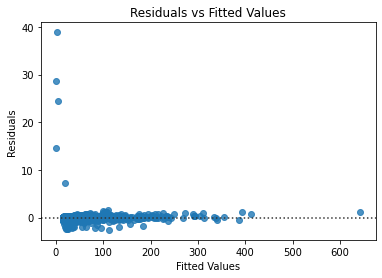

In [ ]:
# Creating residual plot
sns.residplot(linreg.fittedvalues, linreg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

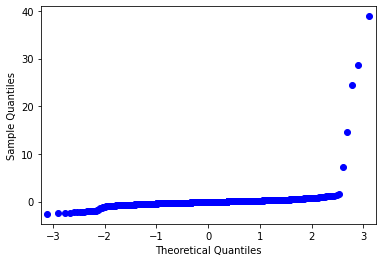

In [ ]:
# QQPlot
figure = sm.qqplot(linreg.resid)

#### Observations:
* There are outliers.
* The model does not satisfy the linearity, constant variance and normality.

#### 4. Provide interpretations for a few of the coeffcients, and comment on whether they make sense.

#### Interpretations:
* Every one minute increase in airline delay, results in 0.98 minute increase in arrival (arrival delay).
* There is an impact of 'late aircraft delay', 'air system delay', 'weather delay' and 'departure delay' on aircraft arrivals (arrival delay).
* There is no effect of day of the week on arrivals. This is evident from the high p-values.
* For every one minute increase in departure delay, arrival delay increases by 0.018 minutes.

#### Subpart 2
If you have done the above steps correctly, you will notice a lot of things "doesn't seem right". We will try to fix a couple of these things here.

#### 1. Removing outliers: _first is to remove outliers. Using the boxplot method, remove the outliers in the ARRIVAL_DELAY variable.

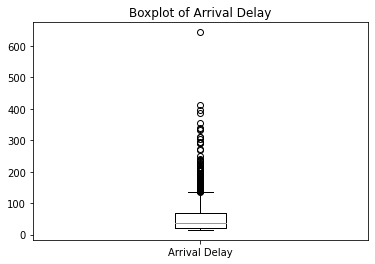

In [ ]:
# Creating the box plot
plt.boxplot(flights['ARRIVAL_DELAY'])
plt.xticks([1],['Arrival Delay'])
plt.title('Boxplot of Arrival Delay')
plt.show()

In [ ]:
# Finding IQR
flights['ARRIVAL_DELAY'].quantile()
Q1 = flights['ARRIVAL_DELAY'].quantile(0.25)
Q3 = flights['ARRIVAL_DELAY'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

45.25


In [ ]:
# Creating threshold values.
threshold_1 = Q3 + (1.5 * IQR)
threshold_2 = Q1 - (1.5 * IQR)
# Dropping values
flights.drop((flights[(flights['ARRIVAL_DELAY'] > threshold_1) | (flights['ARRIVAL_DELAY'] < threshold_2)]).index, inplace = True)

In [ ]:
# Checking values in the dataset
flights.shape[0]

986

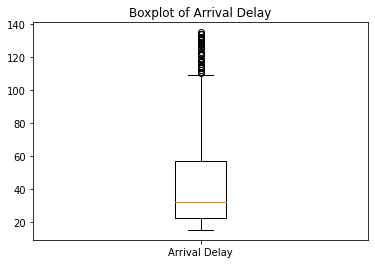

In [ ]:
# Creating the box plot again
plt.boxplot(flights['ARRIVAL_DELAY'])
plt.xticks([1],['Arrival Delay'])
plt.title('Boxplot of Arrival Delay')
plt.show()

#### 2. Refit the linear regression model, but now with log(ARRIVAL_DELAY) as your response. Also, remove the nonsignificant predictors from the previous model (with p-values larger than 0.05) and the AIRLINE variable. (Remember that when removing nonsignificant predictors one can only eliminate one variable per step.)

In [ ]:
flights['LOG_ARRIVAL_DELAY'] = np.log(flights['ARRIVAL_DELAY'] +1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN,DAY_2,DAY_3,DAY_4,DAY_5,DAY_6,DAY_7,LOG_ARRIVAL_DELAY
7,2015,1,1,4,OO,5354,N472CA,ORD,MBS,1317,1349.0,32.0,27.0,1416.0,66,70.0,39.0,222,1555.0,4.0,1523,1559.0,36.0,0,0,NaN,4.0,0.0,11.0,21.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,3.610918
9,2015,1,1,4,UA,1062,N73291,DCA,DEN,1603,1603.0,0.0,12.0,1615.0,249,272.0,248.0,1476,1823.0,12.0,1812,1835.0,23.0,0,0,NaN,23.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,3.178054
19,2015,1,2,5,US,2065,N534UW,CLT,IAH,1120,1128.0,8.0,11.0,1139.0,163,176.0,154.0,912,1313.0,11.0,1303,1324.0,21.0,0,0,NaN,13.0,0.0,8.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,3.091042
21,2015,1,2,5,OO,5211,N943SW,IDA,DEN,1338,1428.0,50.0,31.0,1459.0,91,122.0,64.0,458,1603.0,27.0,1509,1630.0,81.0,0,0,NaN,31.0,0.0,0.0,50.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,4.406719
22,2015,1,2,5,HA,335,N477HA,OGG,HNL,1503,1644.0,101.0,10.0,1654.0,37,50.0,23.0,100,1717.0,17.0,1540,1734.0,114.0,0,0,NaN,0.0,0.0,25.0,89.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,4.744932


In [ ]:
y = flights['LOG_ARRIVAL_DELAY']
X = flights[['LATE_AIRCRAFT_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'WEATHER_DELAY', 'DEPARTURE_DELAY']]
X_int = sm.add_constant(X) 
linreg = sm.OLS(y,X_int).fit() 
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      LOG_ARRIVAL_DELAY   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     2269.
Date:                Sun, 24 Oct 2021   Prob (F-statistic):               0.00
Time:                        15:54:58   Log-Likelihood:                 391.96
No. Observations:                 986   AIC:                            -771.9
Df Residuals:                     980   BIC:                            -742.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7613      0.010    287.307      0.000       2.742       2.780
LATE_AIRCRAFT_DELAY     0.0186      0.000     41.198      0.000       0.018       0.020
AIRLINE_DELAY           0.0188      0.000     40.344      0.000       0.018       0.020
AIR_SYSTEM_DELAY        0.0198      0.000     60.354      0.000       0.019       0.020
WEATHER_DELAY           0.0190      0.001     28.730      0.000       0.018       0.020
DEPARTURE_DELAY         0.0008      0.000      2.283      0.023       0.000       0.002
==============================================================================
Omnibus:                       37.990   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.372
Skew:                          -0.344   Prob(JB):                     5.74e-13
Kurtosis:                       3.948   Cond. No.                         108.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. Perform model diagnostics. Did anything improve?

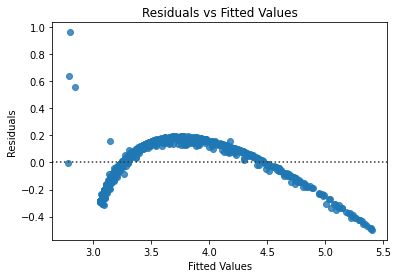

In [ ]:
sns.residplot(linreg.fittedvalues, linreg.resid)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

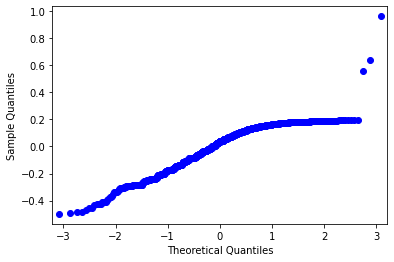

In [ ]:
figure = sm.qqplot(linreg.resid)

#### Observations:
* The model needs improvement.
* The model does not satisfy the constraints of linearity, constant variance and normality.

#### 4. Provide interpretations to a few of the coeffcients. Do you think they make sense?

#### Interpretations:
* Weather delay has an impact on arrival delays. For every one minute increase in weather delay there is an increase of 0.0190 minutes in arrival delay.
* For every one minute increase in air system delay, there is an increase of 0.0198 minutes in arrival delay.

#### 5. Obviously there's still a lot that needs to be done. Provide a few suggestions on how we can further improve the model fit (you don't need to implement them).

#### Suggestions:
* We can add interaction among the independent variables in the model.
* Using Tukey;s ladder transformation, we may increase or decrease the power of independent variables and use them in the model.